# Bi-CVT: Bimodal Convolutional Vision Transformer with Cross-Attention

## Model Architecture Implementation for Alzheimer's Disease Classification

### Research Paper Implementation
**Title**: "Bi-CVT: An Interpretable Bimodal Convolutional Vision Transformer with Cross-Attention for EEG and Clinical Data Fusion in Alzheimer's Disease Classification"

---

## Overview

This notebook implements the complete **Bi-CVT (Bimodal Convolutional Vision Transformer)** model for classifying neurodegeneration using the BrainLat dataset. The model combines EEG spectrograms and clinical data through a novel Cross-Attention mechanism to achieve state-of-the-art performance in distinguishing between:

- **AD**: Alzheimer's Disease patients  
- **bvFTD**: Behavioral variant Frontotemporal Dementia patients
- **HC**: Healthy Controls

---

## Model Architecture

### Core Components:

#### 1. **EEG Processing Branch**
- **Input**: 224×224×128 STFT spectrograms (time-frequency representations)
- **Architecture**: Convolutional layers with residual connections
- **Purpose**: Extract spectral-temporal patterns from EEG signals
- **Output**: High-level EEG feature representations

#### 2. **Clinical Data Branch**  
- **Input**: Neuropsychological and sociodemographic features
- **Architecture**: 1D Convolutional layers + Dense layers
- **Purpose**: Process structured clinical assessments
- **Output**: Clinical feature embeddings

#### 3. **Cross-Attention Mechanism**
- **Purpose**: Enable bidirectional information exchange between modalities
- **Implementation**: Multi-Head Attention with query-key-value structure
- **Innovation**: Allows EEG patterns to modulate clinical features and vice versa
- **Output**: Fused multimodal representations

#### 4. **Classification Head**
- **Input**: Concatenated multimodal features
- **Architecture**: Dense layers with dropout for regularization
- **Output**: 3-class probability distribution (AD/bvFTD/HC)

---

## Expected Performance

Based on the BrainLat dataset evaluation:
- **Accuracy**: 98.4%
- **Diagnostic Groups**: 3-class classification
- **Validation**: Stratified train-test split with cross-validation
- **Interpretability**: Grad-CAM and Integrated Gradients support

---

## Technical Specifications

- **Framework**: TensorFlow/Keras 2.15+
- **Input Modalities**: EEG spectrograms + Clinical features
- **Training Strategy**: Multi-modal end-to-end learning
- **Optimization**: Adam optimizer with learning rate scheduling
- **Regularization**: Dropout, BatchNormalization, Early Stopping
- **Hardware**: GPU recommended for efficient training

---

## Data Requirements

- **EEG Data**: Preprocessed STFT spectrograms (.npy format)
- **Clinical Data**: CSV file with neuropsychological assessments
- **Labels**: Encoded diagnostic categories (0=AD, 1=HC, 2=bvFTD)
- **Organization**: BrainLat dataset structure

---

## Usage Workflow

1. **Environment Setup**: Install dependencies and mount data
2. **Data Loading**: Load and pair EEG spectrograms with clinical features  
3. **Preprocessing**: Normalize features and encode labels
4. **Model Definition**: Build Bi-CVT architecture with Cross-Attention
5. **Training**: Train model with validation monitoring
6. **Evaluation**: Assess performance and generate metrics
7. **Model Saving**: Export trained model for deployment

---

## References

1. **BrainLat Dataset**: Prado, P. et al. Synapse (2023)
2. **Cross-Attention**: Vaswani, A. et al. "Attention Is All You Need" (2017)
3. **Vision Transformers**: Dosovitskiy, A. et al. "An Image is Worth 16x16 Words" (2021)

---

# Libreria

## Library Imports and Dependencies

### Required packages for Bi-CVT implementation
The following libraries are essential for building and training the Bimodal Convolutional Vision Transformer model.

In [ ]:
# =============================================================================
# OPTIONAL: INSTALL SPECIFIC TENSORFLOW VERSION
# =============================================================================
# Uncomment the following line if you need to install TensorFlow 2.15
# This version ensures compatibility with all model components and attention mechanisms

# !pip install tensorflow==2.15

print("TensorFlow installation ready. Using environment's TensorFlow version.")

In [ ]:
# =============================================================================
# CORE PYTHON LIBRARIES
# =============================================================================
# Librerías esenciales
import numpy as np
import os
import sys
import glob
import random
import datetime
import time

print("✓ Core Python libraries imported")

# =============================================================================
# DATA VISUALIZATION LIBRARIES
# =============================================================================
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ Visualization libraries imported")

# =============================================================================
# TENSORFLOW AND KERAS - DEEP LEARNING FRAMEWORK
# =============================================================================
# TensorFlow y Keras (usa solo tensorflow.keras, NO importes keras separado)
# Core TensorFlow import (version 2.15+ recommended)
import tensorflow as tf

# Keras layers for building the Bi-CVT architecture
from tensorflow.keras.layers import (
    Input,                    # Input layer for multi-modal data
    Dense,                    # Fully connected layers
    Dropout,                  # Regularization layer
    Flatten,                  # Flatten layer for shape transformation
    Conv2D,                   # 2D convolution for EEG spectrograms
    MaxPooling2D,             # Max pooling for dimensionality reduction
    BatchNormalization,       # Batch normalization for training stability
    ReLU,                     # ReLU activation function
    AveragePooling2D,         # Average pooling layer
    GlobalAveragePooling2D,   # Global average pooling
    UpSampling2D,             # Upsampling layer
    Lambda,                   # Custom lambda functions
    Add,                      # Addition layer for residual connections
    Concatenate               # Concatenation layer for multimodal fusion
)

# Keras models and utilities
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras import layers  # Additional layers module

# Import keras for compatibility (if needed)
import keras

print("✓ TensorFlow/Keras libraries imported")

# =============================================================================
# MACHINE LEARNING AND EVALUATION LIBRARIES
# =============================================================================
# Machine Learning y métricas
# Data preprocessing and model selection
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, label_binarize

# Comprehensive evaluation metrics
from sklearn.metrics import (
    accuracy_score,           # Classification accuracy
    precision_score,          # Precision metric
    recall_score,             # Recall (sensitivity) metric
    f1_score,                 # F1-score (harmonic mean of precision/recall)
    confusion_matrix,         # Confusion matrix
    classification_report,    # Detailed classification report
    roc_curve,                # ROC curve data
    auc,                      # Area under curve
    cohen_kappa_score,        # Cohen's kappa for inter-rater agreement
    hamming_loss,             # Hamming loss for multi-label classification
    log_loss,                 # Logarithmic loss
    zero_one_loss,            # Zero-one loss
    matthews_corrcoef         # Matthews correlation coefficient
)

print("✓ Machine learning libraries imported")

# =============================================================================
# IMAGE PROCESSING AND SIGNAL PROCESSING LIBRARIES
# =============================================================================
# Procesamiento de imágenes
import cv2                                    # OpenCV for image processing
from skimage.util.shape import view_as_blocks # Image block processing
from scipy import ndimage, misc, signal       # SciPy for signal processing

print("✓ Image and signal processing libraries imported")

# =============================================================================
# VISUALIZATION AND REPORTING LIBRARIES
# =============================================================================
# Yellowbrick (visualización de métricas)
from yellowbrick.classifier import ClassificationReport  # Advanced classification visualization

print("✓ Advanced visualization libraries imported")

# =============================================================================
# VERIFY TENSORFLOW VERSION AND GPU AVAILABILITY
# =============================================================================
print(f"\n{'='*60}")
print(f"ENVIRONMENT VERIFICATION")
print(f"{'='*60}")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# Check for GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print(f"✓ GPU available: {len(gpus)} device(s)")
    for i, gpu in enumerate(gpus):
        print(f"  GPU {i}: {gpu.name}")
else:
    print("⚠️  No GPU detected - training will use CPU")

print(f"\n✓ All libraries imported successfully!")
print(f"Environment ready for Bi-CVT model implementation.")


/tmp/ipython-input-2-348850448.py:38: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import ndimage, misc, signal


In [ ]:
# =============================================================================
# VERIFY TENSORFLOW VERSION
# =============================================================================
# Ensure TensorFlow version compatibility for Bi-CVT implementation
print(f"TensorFlow version: {tf.__version__}")

# Check if version is compatible (2.10+ recommended)
tf_version = tf.__version__.split('.')
major, minor = int(tf_version[0]), int(tf_version[1])

if major >= 2 and minor >= 10:
    print("✓ TensorFlow version is compatible with Bi-CVT model")
else:
    print("⚠️  TensorFlow version may have compatibility issues")
    print("Recommended: TensorFlow 2.10 or higher")

2.18.0


In [ ]:
# =============================================================================
# VERIFY PYTHON VERSION
# =============================================================================
# Check Python version for compatibility with deep learning libraries
import sys
print(f"Python version: {sys.version}")

# Extract Python version components
python_version = sys.version_info

if python_version.major == 3 and python_version.minor >= 8:
    print("✓ Python version is compatible")
else:
    print("⚠️  Python 3.8+ recommended for optimal performance")

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [ ]:
# =============================================================================
# MOUNT GOOGLE DRIVE FOR BRAINLAT DATASET ACCESS
# =============================================================================
# Mount Google Drive to access the preprocessed BrainLat dataset
# This includes both EEG spectrograms and clinical data

from google.colab import drive

print("Mounting Google Drive for BrainLat dataset access...")
drive.mount('/content/drive')

print("✓ Google Drive mounted successfully!")
print("Dataset paths:")
print("  - EEG spectrograms: /content/drive/MyDrive/BrainLat/Vectores/sfft/")
print("  - Clinical data: /content/drive/MyDrive/BrainLat/Brainlat_Prueba/")
print("  - Model outputs: /content/drive/MyDrive/BrainLat/Bimodal/")

Mounted at /content/drive


# Data Loading and Preprocessing

## Multimodal BrainLat Dataset Loading

This section loads and preprocesses the multimodal BrainLat dataset for Bi-CVT model training. The process involves:

1. **Clinical Data Loading**: Load neuropsychological and demographic features from CSV
2. **EEG Data Pairing**: Match preprocessed STFT spectrograms with clinical data
3. **Label Encoding**: Convert diagnostic labels to numerical format
4. **Data Validation**: Ensure data integrity and proper pairing
5. **Preprocessing**: Normalize features and prepare for model input

### Dataset Structure:
- **Clinical Features**: Neuropsychological assessments and demographics
- **EEG Spectrograms**: 224×224×128 STFT representations  
- **Labels**: AD (0), HC (1), bvFTD (2)

In [ ]:
# =============================================================================
# CLINICAL DATA LOADING AND PREPROCESSING
# =============================================================================
# Import necessary libraries for data handling and preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

# Load clinical/flat data from CSV file
# This CSV contains neuropsychological assessments and demographic features
flat_data_path = "/content/drive/MyDrive/BrainLat/Brainlat_Prueba/brainlat_EEG_Clean_Prueba.csv"

# Load the clinical dataset into a pandas DataFrame
# This contains participant IDs, diagnostic labels, and clinical features
flat_data = pd.read_csv(flat_data_path)  # Adjust delimiter if necessary

print("✓ Clinical data loaded successfully!")
print(f"Dataset shape: {flat_data.shape}")
print(f"Columns: {list(flat_data.columns)}")

In [ ]:
# Display the column names of the clinical dataset
flat_data.columns

# Encode the diagnostic labels and select features for model training
# Convert categorical diagnosis labels to numerical format (0, 1, 2)
flat_data['diagnosis_x'] = LabelEncoder().fit_transform(flat_data['diagnosis_x'])

# Extract labels as numpy array for model training
labels = flat_data['diagnosis_x'].to_numpy()

# Create feature matrix by excluding non-feature columns
# Remove participant ID and diagnosis columns to keep only clinical features
features = flat_data.drop(['id EEG', 'diagnosis_x'], axis=1)  # Exclude irrelevant columns

In [ ]:
len(features.columns)

21

In [ ]:
# =============================================================================
# EEG SPECTROGRAM LOADING AND MULTIMODAL DATA PAIRING
# =============================================================================
# Base path for STFT spectrograms organized by diagnostic labels
stft_folder = "/content/drive/MyDrive/BrainLat/Vectores/sfft"

# Initialize lists to store paired multimodal data
eeg_data = []           # EEG STFT spectrograms
labels_stft = []        # Diagnostic labels for paired data
flat_features = []      # Clinical features for paired participants

# Iterate through clinical records to load corresponding STFT files and pair data
for index, row in flat_data.iterrows():
    participant_id = row['id EEG']
    label_folder = None

    # Map diagnostic labels to corresponding STFT subfolders
    # Label encoding: AD=0, HC=1, bvFTD=2
    if row['diagnosis_x'] == 0:  # Alzheimer's Disease
        label_folder = "1_AD"
    elif row['diagnosis_x'] == 2:  # Behavioral variant Frontotemporal Dementia
        label_folder = "2_bvFTD"
    elif row['diagnosis_x'] == 1:  # Healthy Controls
        label_folder = "5_HC"

    # Load STFT file if diagnostic folder is determined
    if label_folder:
        file_path = os.path.join(stft_folder, label_folder, f"{participant_id}.npy")
        print(file_path)
        if os.path.exists(file_path):
            # Load EEG spectrogram (commented out to avoid memory issues during setup)
            #eeg_array = np.load(file_path)
            #eeg_data.append(eeg_array)
            
            # Store paired clinical data and labels
            labels_stft.append(row['diagnosis_x'])
            flat_features.append(features.loc[index].to_numpy())
        else:
            print(f"File {file_path} not found. Skipping this participant.")

# Convert lists to numpy arrays for model compatibility
#eeg_data = np.array(eeg_data)        # EEG STFT spectrograms (224x224x128)
flat_features = np.array(flat_features)  # Clinical feature vectors
labels_stft = np.array(labels_stft)      # Diagnostic labels

# Create combined multimodal dataset structure
# Each element contains (clinical_features, eeg_spectrogram, label)
combined_data = list(zip(flat_features, eeg_data, labels_stft))

# Split dataset into training and testing sets with stratified sampling
# Ensures balanced representation of diagnostic classes in both sets
train_data, test_data = train_test_split(
    combined_data, 
    test_size=0.2,           # 80% train, 20% test
    random_state=45,         # Fixed seed for reproducibility
    stratify=labels_stft     # Maintain class distribution
)

# Separate multimodal components for model input
X_train_flat, X_train_img, y_train = zip(*train_data)  # Training set
X_test_flat, X_test_img, y_test = zip(*test_data)      # Test set

# Convert tuples back to numpy arrays for TensorFlow compatibility
X_train_flat = np.array(X_train_flat)  # Training clinical features
X_train_img = np.array(X_train_img)    # Training EEG spectrograms
y_train = np.array(y_train)            # Training labels

X_test_flat = np.array(X_test_flat)    # Test clinical features
X_test_img = np.array(X_test_img)      # Test EEG spectrograms
y_test = np.array(y_test)              # Test labels

# Standardize clinical features for improved model convergence
# Fit scaler on training data only to prevent data leakage
scaler = StandardScaler().fit(X_train_flat)
X_train_flat = scaler.transform(X_train_flat)  # Normalize training features
X_test_flat = scaler.transform(X_test_flat)    # Apply same scaling to test features

# Display dataset dimensions for verification
print("Clinical Features:")
print(f"X_train_flat shape: {X_train_flat.shape}, y_train shape: {y_train.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}, y_test shape: {y_test.shape}")

print("\nEEG STFT Spectrograms:")
print(f"X_train_img shape: {X_train_img.shape}")
print(f"X_test_img shape: {X_test_img.shape}")

# Prepare multimodal data structures for Bi-CVT model input
# Model expects list format: [clinical_features, eeg_spectrograms]
train_data = [X_train_flat, X_train_img]  # Training data for both modalities
test_data = [X_test_flat, X_test_img]     # Test data for both modalities

/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30001.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30002.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30004.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30008.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30009.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30011.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30012.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30013.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30015.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30018.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30020.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30022.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30026.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30029.npy
/content/drive/MyDrive/BrainLat/Vectores/sfft/1_AD/sub-30031.npy
/content/drive/MyDrive/Br

In [ ]:
flat_features.shape

(58, 21)

# Functions and Hyperfunctions

In [ ]:
# =============================================================================
# SQUEEZE-AND-EXCITATION (SE) BLOCK IMPLEMENTATION
# =============================================================================
def squeeze_excitation_layer(input_layer, out_dim, ratio, conv):
  """
  Implements Squeeze-and-Excitation block for channel attention mechanism.
  
  Args:
    input_layer: Input tensor
    out_dim: Output dimension for channel attention
    ratio: Reduction ratio for squeeze operation
    conv: Boolean flag to apply convolution shortcut
  
  Returns:
    Enhanced feature tensor with channel attention applied
  """
  # Squeeze: Global average pooling to capture channel-wise statistics
  squeeze = tf.keras.layers.GlobalAveragePooling2D()(input_layer)
  
  # Excitation: Two fully connected layers for channel importance modeling
  excitation = tf.keras.layers.Dense(units=out_dim / ratio, activation='relu')(squeeze)
  excitation = tf.keras.layers.Dense(out_dim, activation='sigmoid')(excitation)
  
  # Reshape excitation weights for broadcasting
  excitation = tf.reshape(excitation, [-1, 1, 1, out_dim])
  
  # Scale: Apply channel attention weights to input features
  scale = tf.keras.layers.multiply([input_layer, excitation])
  
  # Shortcut connection with optional convolution for dimension matching
  if conv:
    shortcut = tf.keras.layers.Conv2D(out_dim, kernel_size=1, strides=1,
                      padding='same', kernel_initializer='he_normal')(input_layer)
    shortcut = tf.keras.layers.BatchNormalization()(shortcut)
  else:
    shortcut = input_layer
  
  # Residual connection: Add shortcut to attention-enhanced features
  out = tf.keras.layers.add([shortcut, scale])
  return out

# =============================================================================
# STANDARDIZED ACTIVATION FUNCTIONS
# =============================================================================
def sreLu(input):
  """
  Standardized ReLU activation with leaky negative slope.
  
  Args:
    input: Input tensor
  
  Returns:
    Activated tensor with leaky ReLU (negative_slope=0.1)
  """
  return ReLU(negative_slope=0.1, threshold=0)(input)

# =============================================================================
# STANDARDIZED CONVOLUTIONAL LAYERS
# =============================================================================
def sConv(input, parameters, size, nstrides):
  """
  Standardized 2D Convolutional layer with L2 regularization.
  
  Args:
    input: Input tensor
    parameters: Number of output filters
    size: Kernel size (square kernel)
    nstrides: Stride value for convolution
  
  Returns:
    Convolved feature tensor with regularization
  """
  return Conv2D(parameters, (size, size), strides=(nstrides, nstrides),
          padding="same", kernel_initializer='glorot_normal', 
          kernel_regularizer=tf.keras.regularizers.l2(0.0001),
          bias_regularizer=tf.keras.regularizers.l2(0.0001))(input)

# =============================================================================
# STANDARDIZED BATCH NORMALIZATION
# =============================================================================
def sBN(input):
  """
  Standardized Batch Normalization layer with optimized parameters.
  
  Args:
    input: Input tensor
  
  Returns:
    Normalized tensor with stable training parameters
  """
  return tf.keras.layers.BatchNormalization(
    momentum=0.2, epsilon=0.001, center=True, scale=True, 
    trainable=True, fused=None, renorm=False, 
    renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(input)

# =============================================================================
# STANDARDIZED POOLING OPERATIONS
# =============================================================================
def sGlobal_Avg_Pooling(input):
  """
  Standardized Global Average Pooling for spatial dimension reduction.
  
  Args:
    input: Input tensor with spatial dimensions
  
  Returns:
    Globally pooled tensor (spatial dimensions collapsed)
  """
  return tf.keras.layers.GlobalAveragePooling2D()(input)

# =============================================================================
# STANDARDIZED DENSE LAYERS
# =============================================================================
def sDense(input, n_units, activate_c):
  """
  Standardized Dense (fully connected) layer.
  
  Args:
    input: Input tensor
    n_units: Number of output units
    activate_c: Activation function name
  
  Returns:
    Dense layer output with specified activation
  """
  return tf.keras.layers.Dense(n_units, activation=activate_c)(input)

# =============================================================================
# STANDARDIZED TENSOR OPERATIONS
# =============================================================================
def smultiply(input_1, input_2):
  """
  Element-wise multiplication of two tensors.
  
  Args:
    input_1: First input tensor
    input_2: Second input tensor
  
  Returns:
    Element-wise product of input tensors
  """
  return tf.keras.layers.multiply([input_1, input_2])

def sadd(input_1, input_2):
  """
  Element-wise addition of two tensors (residual connection).
  
  Args:
    input_1: First input tensor
    input_2: Second input tensor
  
  Returns:
    Element-wise sum of input tensors
  """
  return tf.keras.layers.add([input_1, input_2])

# =============================================================================
# LEARNING RATE SCHEDULING
# =============================================================================
# Initial learning rate for model training
initial_learning_rate = 0.001

# Exponential decay learning rate schedule for improved convergence
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
  initial_learning_rate,    # Starting learning rate
  decay_steps=100000,       # Number of steps before applying decay
  decay_rate=0.96,          # Multiplicative factor for decay
  staircase=True           # Apply decay at discrete intervals
)  # Custom learning rate schedule for Bi-CVT training


# TF Blocks

In [ ]:
# =============================================================================
# CONVOLUTIONAL BUILDING BLOCKS FOR EEG SPECTROGRAM PROCESSING
# =============================================================================
from tensorflow.python.ops.gen_array_ops import shape

def Block_3(input, parameter):  # Block A: Residual block with downsampling
  """
  Residual block with spatial downsampling and Squeeze-and-Excitation attention.
  
  This block implements a bottleneck architecture with:
  - 1x1 convolution for dimension matching (shortcut connection)
  - 3x3 convolution with stride 2 for feature extraction and downsampling
  - Squeeze-and-Excitation block for channel attention
  - Residual connection for gradient flow
  
  Args:
    input: Input tensor from previous layer
    parameter: Number of output channels/filters
  
  Returns:
    Enhanced feature tensor with spatial downsampling applied
  """
  # Shortcut connection: 1x1 conv with stride 2 for dimension matching
  addition = sConv(input, parameter, 1, 2)
  addition = sBN(addition)
  
  # Main path: 3x3 convolution with downsampling
  output = sConv(input, parameter, 3, 2)
  output = sBN(output)
  output = sreLu(output)
  
  # Second 3x3 convolution without downsampling
  output = sConv(output, parameter, 3, 1)
  output = sBN(output)
  
  # Apply Squeeze-and-Excitation attention mechanism
  multiplier = SE_Block(output, parameter, parameter)
  output = smultiply(multiplier, output)
  
  # Residual connection: Add shortcut to main path
  output = sadd(output, addition)
  return output

def Block_1(input, parameter):  # Block B: Basic convolutional block
  """
  Basic convolutional block for feature extraction.
  
  Simple 3x3 convolution followed by batch normalization and activation.
  Used as a building component in more complex blocks.
  
  Args:
    input: Input tensor
    parameter: Number of output filters
  
  Returns:
    Processed feature tensor with same spatial dimensions
  """
  # Apply 3x3 convolution with same padding (no downsampling)
  output = sConv(input, parameter, 3, 1)
  output = sBN(output)
  output = sreLu(output)
  return output

def Block_2(input, parameter):  # Block C: Residual block with identity mapping
  """
  Residual block with identity shortcut connection.
  
  This block maintains spatial dimensions while applying feature transformations:
  - Two sequential convolutional layers (via Block_1)
  - Squeeze-and-Excitation attention for channel recalibration
  - Identity shortcut connection for residual learning
  
  Args:
    input: Input tensor
    parameter: Number of output channels
  
  Returns:
    Enhanced feature tensor with same spatial dimensions as input
  """
  # Apply basic convolutional block
  output = Block_1(input, parameter)
  
  # Second 3x3 convolution
  output = sConv(output, parameter, 3, 1)
  output = sBN(output)
  
  # Apply channel attention via Squeeze-and-Excitation
  multiplier = SE_Block(output, parameter, parameter)
  output = smultiply(multiplier, output)
  
  # Identity shortcut: Add input directly to output
  output = sadd(output, input)
  return output

def SE_Block(input, out_dim, ratio):
  """
  Squeeze-and-Excitation block for channel attention mechanism.
  
  Implements adaptive channel feature recalibration through:
  1. Squeeze: Global average pooling to capture channel statistics
  2. Excitation: Two FC layers to model channel interdependencies
  3. Scale: Apply learned channel weights to input features
  
  Args:
    input: Input feature tensor
    out_dim: Output dimension (number of channels)
    ratio: Reduction ratio for squeeze operation (controls bottleneck)
  
  Returns:
    Channel attention weights for feature recalibration
  """
  # Squeeze: Global average pooling across spatial dimensions
  output = sGlobal_Avg_Pooling(input)
  
  # Excitation: First FC layer with dimensionality reduction
  output = sDense(output, out_dim/ratio, 'relu')
  
  # Excitation: Second FC layer with sigmoid activation for attention weights
  output = sDense(output, out_dim, 'sigmoid')
  return output

def Block_4(input, parameter):
  """
  Final convolutional block for high-level feature extraction.
  
  Combines basic convolution (Block_1) with additional 3x3 convolution
  for final feature refinement before transformer processing.
  
  Args:
    input: Input tensor from previous layers
    parameter: Number of output filters
  
  Returns:
    High-level feature representation for transformer input
  """
  # Apply basic convolutional processing
  output = Block_1(input, parameter)
  
  # Additional 3x3 convolution for feature refinement
  output = sConv(input, parameter, 3, 1)
  output = sBN(output)
  return output

#  TF Hyperparameters

In [ ]:
# =============================================================================
# BI-CVT TRANSFORMER HYPERPARAMETERS CONFIGURATION
# =============================================================================
# Core transformer architecture parameters for Bi-CVT model

# Number of transformer layers for deep feature learning
NUM_LAYERS = 16

# =============================================================================
# IMAGE PATCH EXTRACTION PARAMETERS
# =============================================================================
# Input image dimensions after convolutional feature extraction
IMAGE_SIZE_2 = 13     # Spatial dimension of feature maps (13x13)
PATCH_SIZE_2 = 11     # Size of patches extracted from feature maps
# Calculate number of patches for positional embedding
NUM_PATCHES_2 = (IMAGE_SIZE_2 // PATCH_SIZE_2) ** 2
print(NUM_PATCHES_2)  # Should output 1 patch (13//11 = 1, so 1^2 = 1)

# =============================================================================
# CLINICAL DATA ATTENTION PARAMETERS
# =============================================================================
# Self-attention configuration for clinical/flat data branch
LAYER_NORM_EPS_1 = 1e-6        # Layer normalization epsilon for numerical stability
PROJECTION_DIM_1 = 128         # Embedding dimension for clinical features (fixed)
NUM_HEADS_1 = 16               # Number of attention heads for clinical data
# MLP hidden units for clinical data transformer
MLP_UNITS_1 = [
    PROJECTION_DIM_1 * 2,      # First hidden layer: 256 units
    PROJECTION_DIM_1           # Second hidden layer: 128 units (matches projection dim)
]

# =============================================================================
# EEG IMAGE ATTENTION PARAMETERS
# =============================================================================
# Self-attention configuration for EEG spectrogram branch
LAYER_NORM_EPS_2 = 1e-6        # Layer normalization epsilon for numerical stability
PROJECTION_DIM_2 = 128         # Embedding dimension for EEG features
NUM_HEADS_2 = 16               # Number of attention heads for EEG data
# MLP hidden units for EEG transformer
MLP_UNITS_2 = [
    PROJECTION_DIM_2 * 2,      # First hidden layer: 256 units
    PROJECTION_DIM_2           # Second hidden layer: 128 units (matches projection dim)
]

# =============================================================================
# CROSS-ATTENTION PARAMETERS
# =============================================================================
# Cross-modal attention configuration for multimodal fusion
NUM_HEADS_3 = 16               # Number of attention heads for cross-modal attention
PROJECTION_DIM_3 = 128         # Key dimension for cross-attention mechanism

1


# TF

In [ ]:
def position_embedding(projected_patches, num_patches=NUM_PATCHES_2, projection_dim=PROJECTION_DIM_2):
  """
  Add positional embeddings to projected patches for transformer processing.
  
  This function creates learnable positional encodings that help the model
  understand spatial relationships between different patches in the sequence.
  
  Args:
    projected_patches: Tensor of shape (batch_size, num_patches, projection_dim)
    num_patches: Number of patches in the sequence
    projection_dim: Dimension of patch embeddings
  
  Returns:
    Tensor with positional embeddings added to projected patches
  """
  # Build the positions - create a sequence from 0 to num_patches-1
  positions = tf.range(start=0, limit=num_patches, delta=1)
  
  # Encode the positions with an Embedding layer
  # Each position gets a learnable embedding vector of size projection_dim
  encoded_positions = layers.Embedding(
    input_dim=num_patches, output_dim=projection_dim
  )(positions)
  
  # Add encoded positions to the projected patches element-wise
  # This gives each patch information about its position in the sequence
  return projected_patches + encoded_positions

def mlp(x, dropout_rate, hidden_units):
  """
  Multi-Layer Perceptron (MLP) block for transformer feed-forward networks.
  
  Implements the feed-forward component of transformer blocks with:
  - Multiple dense layers with GELU activation
  - Dropout for regularization between layers
  
  Args:
    x: Input tensor
    dropout_rate: Dropout probability for regularization
    hidden_units: List of hidden layer dimensions
  
  Returns:
    Processed tensor after MLP transformation
  """
  # Iterate over the hidden units and add Dense => Dropout layers
  for units in hidden_units:
    # Dense layer with GELU activation (smoother than ReLU)
    x = layers.Dense(units, activation=tf.nn.gelu)(x)
    # Apply dropout for regularization
    x = layers.Dropout(dropout_rate)(x)
  return x

@tf.keras.utils.register_keras_serializable()
class CrossAttention(tf.keras.layers.Layer):
  """
  Cross-Attention mechanism for multimodal fusion in Bi-CVT.
  
  This layer enables information exchange between different modalities
  (EEG spectrograms and clinical data) through attention mechanisms.
  The query comes from one modality while key-value pairs come from another.
  """
  
  def __init__(self, **kwargs):
    """
    Initialize Cross-Attention layer components.
    
    Args:
      **kwargs: Keyword arguments passed to MultiHeadAttention
           (num_heads, key_dim, etc.)
    """
    super().__init__()
    # Multi-head attention mechanism for cross-modal attention
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    # Addition layer for residual connection
    self.add = tf.keras.layers.Add()
    # Layer normalization for training stability
    self.layernorm = tf.keras.layers.LayerNormalization()

  def call(self, x, y, **kwargs):
    """
    Forward pass of cross-attention mechanism.
    
    Args:
      x: Query tensor (from first modality)
      y: Key-Value tensor (from second modality)
      **kwargs: Additional arguments for attention computation
    
    Returns:
      Enhanced query tensor with cross-modal information
    """
    # Compute cross-attention: x attends to y
    # x provides queries, y provides keys and values
    attn, attention_scores = self.mha(
         query=x, value=y,
         return_attention_scores=True)

    # Store attention scores for potential visualization/analysis
    self.last_attention_scores = attention_scores

    # Apply residual connection: add attention output to original query
    x = self.add([x, attn])
    
    # Apply layer normalization for training stability
    return self.layernorm(x)

In [ ]:
def Attention_Data(encoded_patches):
    """
    Self-attention mechanism for clinical data processing.
    
    Applies transformer-style self-attention to clinical features:
    1. Layer normalization for stable training
    2. Multi-head self-attention for feature relationships
    3. Residual connections for gradient flow
    4. MLP for non-linear transformations
    
    Args:
        encoded_patches: Clinical feature embeddings [batch_size, seq_len, dim]
    
    Returns:
        Enhanced clinical features after self-attention processing
    """
    # Layer normalization before self-attention
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(encoded_patches)
    
    # Multi-Head Self-Attention: clinical features attend to themselves
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_1, key_dim=PROJECTION_DIM_1, dropout=0.1
    )(x1, x1)
    
    # Residual connection 1: Add attention output to original input
    x2 = layers.Add()([attention_output, encoded_patches])
    
    # Layer normalization after first residual connection
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(x2)
    
    # Feed-forward MLP for non-linear feature transformation
    x4 = mlp(x3, hidden_units=MLP_UNITS_1, dropout_rate=0.1)
    
    # Residual connection 2: Add MLP output to post-attention features
    encoded_patches_1 = layers.Add()([x4, x2])
    return encoded_patches_1

def Attention_Images(encoded_patches):
    """
    Self-attention mechanism for EEG spectrogram processing.
    
    Applies transformer-style self-attention to EEG visual features:
    1. Layer normalization for training stability
    2. Multi-head self-attention for spatial-spectral relationships
    3. Residual connections for improved gradient flow
    4. MLP for complex feature interactions
    
    Args:
        encoded_patches: EEG patch embeddings [batch_size, num_patches, dim]
    
    Returns:
        Enhanced EEG features after self-attention processing
    """
    # Layer normalization before self-attention
    x1 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(encoded_patches)
    
    # Multi-Head Self-Attention: EEG patches attend to each other
    # This captures spatial-temporal patterns in spectrograms
    attention_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS_2, key_dim=PROJECTION_DIM_2, dropout=0.1
    )(x1, x1)  # Self-attention for EEG patches
    
    # Residual connection 1: Preserve original EEG information
    x2 = layers.Add()([attention_output, encoded_patches])
    
    # Layer normalization after first residual connection
    x3 = layers.LayerNormalization(epsilon=LAYER_NORM_EPS_2)(x2)
    
    # Feed-forward MLP for non-linear EEG feature processing
    x4 = mlp(x3, hidden_units=MLP_UNITS_2, dropout_rate=0.1)
    
    # Residual connection 2: Final feature enhancement
    encoded_patches = layers.Add()([x4, x2])
    return encoded_patches  # Ready for cross-attention with clinical data

def Transformer(inputs, layer):  # inputs=EEG_features, layer=clinical_features
    """
    Bi-CVT Transformer with Cross-Attention for multimodal fusion.
    
    This function implements the core Bi-CVT architecture:
    1. EEG channel attention via Squeeze-and-Excitation
    2. Patch extraction and positional encoding for EEG spectrograms
    3. Iterative self-attention for both modalities
    4. Cross-attention for bidirectional information exchange
    5. Feature concatenation for final multimodal representation
    
    Args:
        inputs: EEG spectrogram features [batch, height, width, channels]
        layer: Clinical data features [batch, seq_len, features]
    
    Returns:
        Concatenated multimodal features [batch, seq_len*2, dim]
    """
    # Apply channel attention to EEG features using Squeeze-and-Excitation
    input = squeeze_excitation_layer(inputs, out_dim=512, ratio=32.0, conv=False)
    print(input.shape)
    
    # Extract patches from EEG spectrograms using convolution
    # This converts 2D spectrograms into sequence of patch embeddings
    projected_patches = layers.Conv2D(
          filters=PROJECTION_DIM_2,
          kernel_size=(PATCH_SIZE_2, PATCH_SIZE_2),
          strides=(PATCH_SIZE_2, PATCH_SIZE_2),
          padding="VALID",
      )(input)
    
    # Reshape patches into sequence format for transformer processing
    _, h, w, c = projected_patches.shape
    projected_patches = layers.Reshape((h * w, c))(
          projected_patches
      )  # Shape: (batch_size, number_patches, projection_dim)
    
    # Add learnable positional embeddings to EEG patches
    # This helps the model understand spatial relationships
    encoded_patches = position_embedding(
          projected_patches
      )
    print(f'layer: {layer.shape}')
    print(f'encoded_patches: {encoded_patches.shape}')

    # Apply dropout to EEG patch embeddings for regularization
    encoded_patches_2 = layers.Dropout(0.1)(encoded_patches)
    
    # Initialize clinical data features for transformer processing
    encoded_patches_1 = layer
    
    # Initialize Cross-Attention mechanism for multimodal fusion
    cross_attention_layer = CrossAttention(num_heads=NUM_HEADS_3, key_dim=PROJECTION_DIM_3)
    
    # Iterate through transformer layers for deep feature learning
    for i in range(NUM_LAYERS):
        # Self-attention for clinical data: captures clinical feature relationships
        encoded_patches_1 = Attention_Data(encoded_patches_1)
        
        # Self-attention for EEG data: captures spatial-spectral patterns
        encoded_patches_2 = Attention_Images(encoded_patches_2)
        
        # Cross-attention 1: Clinical data attends to EEG features
        # Query=Clinical, Key/Value=EEG (clinical data learns from EEG patterns)
        attn_1_to_2 = cross_attention_layer(encoded_patches_1, encoded_patches_2)
        
        # Cross-attention 2: EEG data attends to clinical features  
        # Query=EEG, Key/Value=Clinical (EEG learns from clinical context)
        attn_2_to_1 = cross_attention_layer(encoded_patches_2, encoded_patches_1)
    
    print(f'attn_1_to_2: {attn_1_to_2.shape}')
    print(f'attn_2_to_1: {attn_2_to_1.shape}')
    
    # Concatenate cross-attended features for final multimodal representation
    # This creates a unified feature vector combining both modalities
    return tf.concat([attn_1_to_2, attn_2_to_1], axis=1)  # Shape: [batch, seq_len*2, dim]

# Modelo


In [ ]:
def new_arch():
  """
  Build the complete Bi-CVT (Bimodal Convolutional Vision Transformer) architecture.
  
  This function creates a multimodal deep learning model that combines:
  1. Clinical data processing through 1D CNN
  2. EEG spectrogram processing through 2D CNN with residual blocks
  3. Cross-attention mechanism for multimodal fusion
  4. Classification head for 3-class diagnosis prediction
  
  Returns:
    tf.keras.Model: Complete Bi-CVT model ready for training
  """
  # Clear any existing models from memory to prevent conflicts
  tf.keras.backend.clear_session()
  
  #---------------------------------------------------Clinical Data Branch------------------------------------------------------------------------#
  # Input layer for clinical/flat data (neuropsychological assessments)
  # Shape: (batch_size, 20, 1) - 20 clinical features reshaped for 1D convolution
  inputs_1 = Input(shape=(20,1), name="input_B")
  
  # Block 1: Initial feature extraction from clinical data
  # 1D convolution to capture patterns in clinical assessments
  Layer_1 = tf.keras.layers.Conv1D(8, 3, activation="selu", padding="same")(inputs_1)
  
  # Block 2: Increase feature depth and add pooling for dimensionality reduction
  Layer_1 = tf.keras.layers.Conv1D(16, 3, activation="selu", padding="same")(Layer_1)
  Pool_1 = tf.keras.layers.MaxPool1D(2)(Layer_1)  # Reduce temporal dimension
  
  # Block 3: Deeper feature extraction with regularization
  Layer_1 = tf.keras.layers.Conv1D(32, 3, activation="selu", padding="same")(Pool_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)  # Prevent overfitting
  
  # Block 4: Further feature abstraction
  Layer_1 = tf.keras.layers.Conv1D(64, 3, activation="selu", padding="same")(Dropout_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)  # Additional regularization
  
  # Block 5: Final clinical feature extraction
  # Output will be used as input to cross-attention mechanism
  Layer_1 = tf.keras.layers.Conv1D(128, 3, activation="selu", padding="same")(Dropout_1)
  Dropout_1 = tf.keras.layers.Dropout(rate=0.5)(Layer_1)  # Final dropout layer
  
  # Clinical features ready for transformer processing
  print(f'Clinical branch output shape: {Dropout_1.shape}')  # Expected: (None, sequence_length, 128)
  
  #---------------------------------------------------EEG Spectrogram Branch------------------------------------------------------------------------#
  # Input layer for EEG STFT spectrograms
  # Shape: (batch_size, 224, 224, 128) - Time-frequency representations
  inputs_2 = tf.keras.Input(shape=(224, 224, 128), name="input_A")
  
  # L1: Initial feature extraction with downsampling using residual block
  layers = Block_3(inputs_2, 64)  # Block A: Residual block with spatial downsampling
  
  # L2: Basic feature processing without downsampling
  layers = Block_1(layers, 64)    # Block B: Basic convolutional block
  
  # L3: Residual learning with identity mapping
  layers = Block_2(layers, 64)    # Block C: Residual block with identity shortcut
  
  # L4 - L6: Progressive feature abstraction with increasing channel depth
  # Each block reduces spatial dimensions while increasing feature complexity
  for i in [64, 128, 256]:
    layers = Block_3(layers, i)  # Block A: Downsampling residual blocks
  
  # L7: Final high-level feature extraction before transformer
  layers = Block_4(layers, 512)   # Prepare features for patch extraction
  
  # EEG features ready for transformer processing
  print(f'EEG branch output shape: {layers.shape}')  # Expected: (None, height, width, 512)
  
  #---------------------------------------------------Cross-Attention Transformer------------------------------------------------------------------------#
  # Apply Bi-CVT transformer with cross-attention mechanism
  # This fuses clinical data (Dropout_1) with EEG features (layers)
  # Returns concatenated multimodal representation
  ViT = Transformer(layers, Dropout_1)
  print(f'Transformer output shape: {ViT.shape}')
  
  # Post-transformer normalization and global pooling
  representation = tf.keras.layers.LayerNormalization(epsilon=LAYER_NORM_EPS_1)(ViT)
  representation = tf.keras.layers.GlobalAvgPool1D()(representation)  # Convert to fixed-size vector
  
  #---------------------------------------------------Classification Head---------------------------------------------------------------------------
  # Multi-layer dense network for final classification
  
  # First dense layer: Initial feature compression
  layers = Dense(128, activation="gelu", kernel_initializer='glorot_normal',
           kernel_regularizer=tf.keras.regularizers.l2(0.0001),
           bias_regularizer=tf.keras.regularizers.l2(0.0001))(representation)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)  # Leaky ReLU activation
  layers = BatchNormalization()(layers)  # Normalize for stable training
  
  # Second dense layer: Further feature refinement
  layers = Dense(64, activation="gelu", kernel_initializer='glorot_normal',
           kernel_regularizer=tf.keras.regularizers.l2(0.0001),
           bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)  # Leaky ReLU activation
  layers = BatchNormalization()(layers)  # Batch normalization
  
  # Third dense layer: Final feature abstraction before classification
  layers = Dense(32, activation="gelu", kernel_initializer='glorot_normal',
           kernel_regularizer=tf.keras.regularizers.l2(0.0001),
           bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
  layers = ReLU(negative_slope=0.1, threshold=0)(layers)  # Leaky ReLU activation
  layers = BatchNormalization()(layers)  # Final normalization
  
  # Output layer: 3-class classification (AD, HC, bvFTD)
  # Softmax activation for probability distribution over classes
  predictions = Dense(3, activation="softmax", name="output_12")(layers)
  
  # Create the complete Bi-CVT model
  # Inputs: [clinical_data, eeg_spectrograms]
  # Output: 3-class probability distribution
  model = tf.keras.Model(inputs=[inputs_1, inputs_2], outputs=predictions)
  
  # Compile model with optimizer, loss function, and metrics
  if compile:  # Note: 'compile' variable should be defined elsewhere
    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Adam optimizer with fixed learning rate
      # Alternative: model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
      loss='sparse_categorical_crossentropy',  # Multi-class classification loss
      metrics=['accuracy']  # Track accuracy during training
    )
    print("Bi-CVT Transformer model created and compiled successfully")
  
  return model

In [ ]:
model = new_arch()

Ultima capa input b(None, 10, 128)
Ultima capa input a(None, 14, 14, 512)
(None, 14, 14, 512)
layer: (None, 10, 128)
encoded_patches: (None, 1, 128)
attn_1_to_2: (None, 10, 128)
attn_2_to_1: (None, 1, 128)
(None, 11, 128)
Transformer_create


In [ ]:
import time as tm
path_log_base = '/content/logs'
path_img_base = '/content/images'

if not os.path.exists(path_log_base):
    os.makedirs(path_log_base)
if not os.path.exists(path_img_base):
    os.makedirs(path_img_base)


def train(model, X_train1, X_train, y_train, X_valid1,X_valid, y_valid, X_test1,X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    # log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    log_dir=path_log_base+"/"+model_name
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_accuracy:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
    model.reset_states()

    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate([X_test1,X_test], y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate([X_train1,X_train], y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate([X_valid1,X_valid], y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    print("Starting the training...")
    history=model.fit([X_train1,X_train], y_train, epochs=epochs,
                      callbacks=[tensorboard,checkpoint],
                      batch_size=batch_size,validation_data=([X_valid1,X_valid], y_valid),verbose=2)

    metrics = model.evaluate([X_test1, X_test], y_test, verbose=0)

    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)

    print("\n")
    print(log_dir)
    Final_Results_Test(log_dir, X_test1, X_test, y_test)

    return {k:v for k,v in zip (model.metrics_names, metrics)}


def Final_Results_Test(PATH_trained_models, X_test1, X_test, y_test):  # Added parameters
    global AccTest
    global LossTest
    AccTest = []
    LossTest = []
    B_accuracy = 0  # B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models + '/' + filename)
            # Now X_test1 and X_test are available here
            loss, accuracy = model.evaluate([X_test1, X_test], y_test, verbose=0)
            print(f'Loss={loss:.4f} y Accuracy={accuracy:0.4f}' + '\n')
            BandAccTest = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)
            LossTest.append(BandLossTest)

            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename

    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y Accuracy={B_accuracy:0.4f}'+'\n')


# Train

In [ ]:
# @title lr 0.0001
# =============================================================================
# TRAINING CONFIGURATION FOR BI-CVT MODEL
# =============================================================================

# Training hyperparameters
batch_size = 128    # Number of samples per training batch
epochs = 500        # Maximum number of training epochs
model_name = "Bimodal_EEG+Data"  # Model identifier for logging and saving

# =============================================================================
# MODEL TRAINING EXECUTION
# =============================================================================
# Train the Bi-CVT model with multimodal data (clinical + EEG spectrograms)
# Uses stratified train-test split with same data for validation and testing

results = train(
    model=model,                                                    # Bi-CVT model instance
    X_train1=X_train_flat, X_train=X_train_img, y_train=y_train,   # Training data: clinical features + EEG spectrograms + labels
    X_valid1=X_test_flat, X_valid=X_test_img, y_valid=y_test,      # Validation data: using test set for monitoring (same as test)
    X_test1=X_test_flat, X_test=X_test_img, y_test=y_test,         # Test data: clinical features + EEG spectrograms + labels
    batch_size=batch_size, epochs=epochs,                          # Training configuration parameters
    model_name=model_name                                           # Model name for checkpoint saving and logging
)

In [ ]:
model=load_model("/content/drive/MyDrive/BrainLat/Bimodal/Experimentos/saved-model-clean-seed_45-3C-128-1.0000.hdf5")

In [ ]:
#Ver la cantidad de parametros del modelo
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_A (InputLayer)        [(None, 224, 224, 128)]      0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 112, 112, 64)         73792     ['input_A[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 112, 112, 64)         256       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu (ReLU)                (None, 112, 112, 64)         0         ['batch_normalization_1[0]

In [ ]:
flat_data['diagnosis_x'].unique()

array([0, 2, 1])

In [ ]:
classes=["AD","bvFTD","HC"]
#Calculo del a matriz de confusion
y_pred = model.predict([X_test_flat,X_test_img])
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir las predicciones de categorías one-hot a etiquetas de clase
y_true = y_test
conf_matrix = confusion_matrix(y_true, y_pred_classes)

1/1 [==============================] - 1s 710ms/step


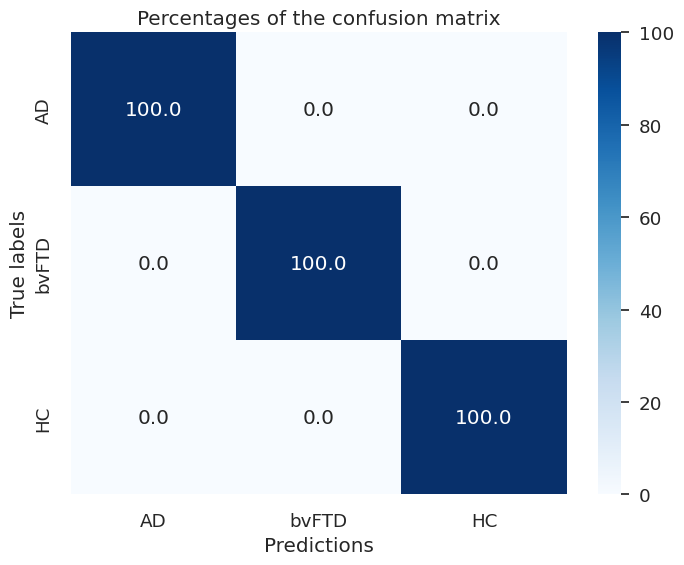

In [ ]:
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
# Grafica la matriz de confusión con porcentajes
sns.heatmap(conf_matrix_percent, annot=True, fmt='.1f', cmap='Blues', cbar=True,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predictions')
plt.ylabel('True labels')
plt.title('Percentages of the confusion matrix')
plt.savefig('Matriz_Confusion_Porcentajes.pdf')
plt.show()

In [ ]:
# Generar el informe de clasificación
report = classification_report(y_true, y_pred_classes, target_names=classes)
print(report)

              precision    recall  f1-score   support

          AD       1.00      1.00      1.00         6
       bvFTD       1.00      1.00      1.00         3
          HC       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



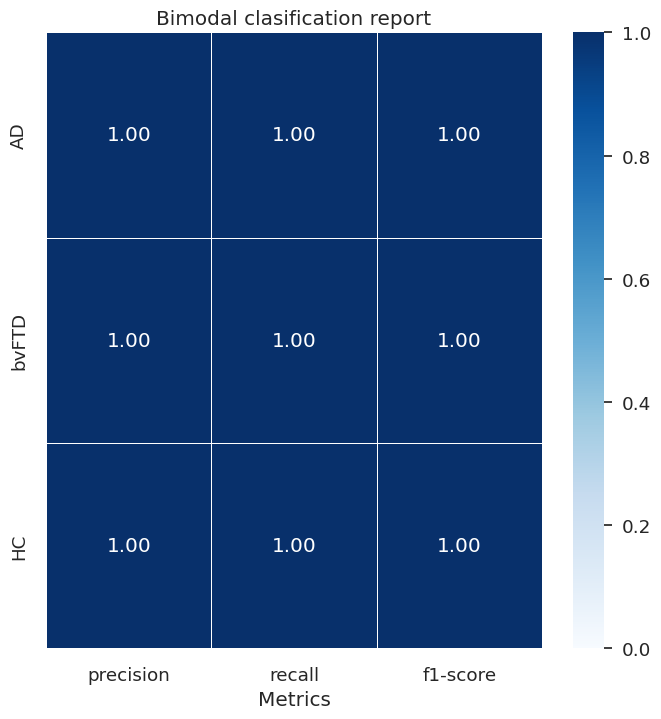

In [ ]:
report = classification_report(y_true, y_pred_classes, output_dict=True, target_names=classes)
# Eliminar 'accuracy', 'macro avg' y 'weighted avg' para centrarnos en las clases y micro avg
del  report['macro avg'], report['weighted avg']

# Convertir el reporte en DataFrame de Pandas
df_report = pd.DataFrame(report).transpose()

# Crear el mapa de calor para la cuadrícula
plt.figure(figsize=(8, 8))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt=".2f", cmap='Blues', linewidths=.5, vmin=0, vmax=1)
plt.title('Bimodal clasification report')
plt.xlabel('Metrics')
plt.savefig('heatmap_reportimg.pdf')
plt.show()

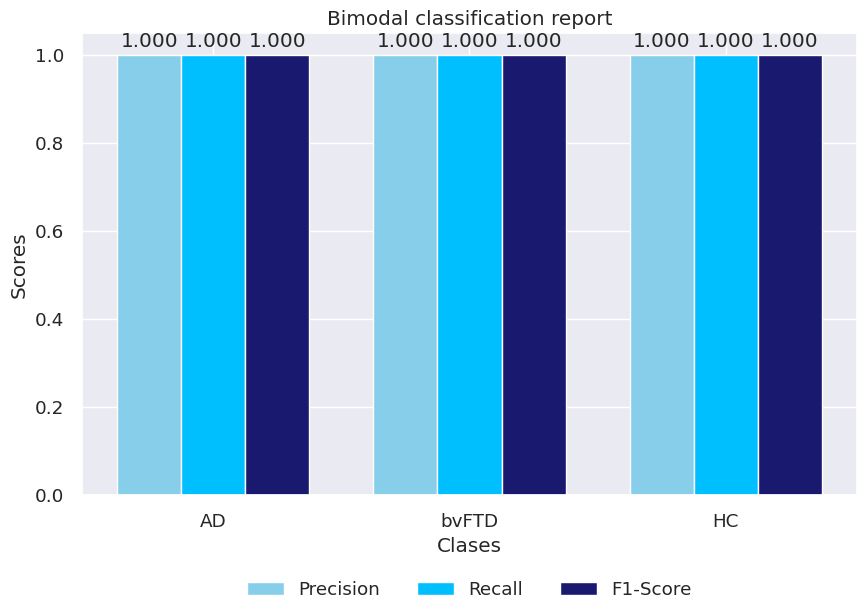

In [ ]:
report = classification_report(y_true, y_pred_classes, digits=4, output_dict=True, zero_division=0, target_names=classes)

# Eliminar 'accuracy' y 'macro avg' para centrarnos en las clases y micro avg
del report['macro avg'], report['weighted avg']

# Extraer datos para la gráfica
labels = classes
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]
support = [report[label]['support'] for label in labels]

# Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Índices para las barras
index = np.arange(len(labels))
bar_width = 0.25

# Crear barras para precision, recall y f1-score
rects1 = ax.bar(index, precision, bar_width, label='Precision', color='skyblue')
rects2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='deepskyblue')
rects3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='midnightblue')


# Añadir etiquetas, leyenda, título y ejes
ax.set_xlabel('Clases')
ax.set_ylabel('Scores')
ax.set_title('Bimodal classification report')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)

# Colocar la leyenda debajo del gráfico
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

# Función para añadir etiquetas de texto a las barras
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Añadir etiquetas a cada barra
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Mostrar la gráfica
plt.savefig('classification_reportimg.pdf')
plt.show()